<span style="font-size:42px"><b>Practise Case 03</b></span><br><br>
<span style="font-size:36px">Foundation Of Data Engineering</span>

Copyright 2019 Gunawan Lumban Gaol

Licensed under the Apache License, Version 2.0 (the "License"); you may not use this file except in compliance with the License. You may obtain a copy of the License at http://www.apache.org/licenses/LICENSE-2.0

Unless required by applicable law or agreed to in writing, software distributed under the License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the License for the specific language overning permissions and limitations under the License.

# Import Packages

In [12]:
import numpy as np
import pandas as pd
from tqdm import tqdm_notebook as tqdm
import time
from configparser import ConfigParser
import matplotlib.pyplot as plt

# Instagram scraper library
from igramscraper.instagram import Instagram
from edapy.edapy.scraping import get_account_metadata, get_all_media_ids, get_all_media_comments

# Text Processing library
import re
from langdetect import detect
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from textblob import TextBlob

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gunawan.gaol\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
config = ConfigParser()
config.read('./config.ini')

['./config.ini']

In [14]:
def preprocess_text(X, lang='indonesian'):
    # Copy the data
    res = X.copy()
    
    # Lower casing
    res = res.str.lower()
    
    # Punctuation removal
    res = res.str.replace('[^\w\s]','')
    
    # Stopwords removal
    stop = stopwords.words(lang)
    res = res.apply(lambda x: " ".join(x for x in str(x).split() if x not in stop))
    
    # Frequent words removal
    freq = pd.Series(' '.join(res).split()).value_counts()[:10]
    freq = list(freq.index)
    res = res.apply(lambda x: " ".join(x for x in str(x).split() if x not in freq))
    
    # Rare words removal
    rare_word = pd.Series(' '.join(res).split()).value_counts()[-10:]
    rare_word = list(rare_word.index)
    res = res.apply(lambda x: " ".join(x for x in str(x).split() if x not in freq))
            
    return res

In [54]:
def translate_text(X, from_lang='id', to_lang='en'):
    res = X.copy()
    
    # Translate the Words
    translated_list = []
    for text in tqdm(res):
        try:
            text_str = TextBlob(text)
            lang = detect(text)
            trans = text_str.translate(from_lang=from_lang, to=to_lang)
            translated_list.append(str(trans))
        except HttpError as e:
            print(e)
            break
        except:
            translated_list.append(text)
    
    return pd.Series(translated_list)

In [16]:
def create_df(X):
    res = X.copy()
    
    # Stemming
    st = PorterStemmer()
    res = res.apply(lambda x: " ".join([st.stem(word) for word in str(x).split()]))
    
    # Create new empty dataframe
    df = pd.DataFrame()
    df['text'] = res
    
    # Labelling
    for i, text in tqdm(enumerate(res)):
        textB = TextBlob(text)
        sentiment = textB.sentiment.polarity
        subjectivity = textB.sentiment.subjectivity
        if sentiment < 0.00 :
            sentimentclass = 'Negative'            
        elif sentiment > 0.00 :
            sentimentclass = 'Positive'            
        else :
            sentimentclass = 'Netral'
        df.loc[i,'sentiment'] = sentiment
        df.loc[i,'sentimentclass'] = sentimentclass
        df.loc[i,'subjectivity'] = subjectivity
    return df

# Import External Data

Since requests usually comes with limitation of number of requests per time interval, use different proxy to bypass the limit.

In [17]:
proxies = pd.read_csv('txt/cnU9FuCeHx.txt', header=None)[0].values

The process below will download all comments from each post in the user account by using package [igramscraper](https://github.com/realsirjoe/instagram-scraper).

Steps in getting the comments:
* get account metadata
* get all media ids using account metadata
* get all media comments using media ids

*Note that the account username is anonymized since this notebook will be made public.*

## Fintech1

In [18]:
fintech1_username = config['instagram']['FINTECH1']
fintech1_metadata = get_account_metadata(fintech1_username)

In [8]:
fintech1_media_ids = get_all_media_ids(fintech1_metadata)

In [11]:
get_all_media_comments(fintech1_media_ids[:1000], 'csv/output1.csv', proxies)

## Fintech2

In [19]:
fintech2_username = config['instagram']['FINTECH2']
fintech2_metadata = get_account_metadata(fintech2_username)

In [63]:
fintech2_media_ids = get_all_media_ids(fintech2_metadata)

In [66]:
get_all_media_comments(fintech2_media_ids[:1000], 'csv/output2.csv', proxies)

Response code is 429. Body: {"message": "rate limited", "status": "fail"} Something went wrong. Please report issue., Code:429
Response code is 429. Body: {"message": "rate limited", "status": "fail"} Something went wrong. Please report issue., Code:429
Expecting value: line 1 column 1 (char 0)
Could not extract gis from page, Code:500
Could not extract gis from page, Code:500
Could not extract gis from page, Code:500
Could not extract gis from page, Code:500
Response code is 429. Body: {"message": "rate limited", "status": "fail"} Something went wrong. Please report issue., Code:429
Response code is 429. Body: {"message": "rate limited", "status": "fail"} Something went wrong. Please report issue., Code:429
Response code is 429. Body: {"message": "rate limited", "status": "fail"} Something went wrong. Please report issue., Code:429
Response code is 429. Body: {"message": "rate limited", "status": "fail"} Something went wrong. Please report issue., Code:429
Could not extract gis from p

## Fintech3

In [20]:
fintech3_username = config['instagram']['FINTECH3']
fintech3_metadata = get_account_metadata(fintech3_username)

In [68]:
fintech3_media_ids = get_all_media_ids(fintech3_metadata)

In [69]:
get_all_media_comments(fintech3_media_ids[:1000], 'csv/output3.csv', proxies)

Response code is 429. Body: {"message": "rate limited", "status": "fail"} Something went wrong. Please report issue., Code:429
Could not extract gis from page, Code:500
Response code is 429. Body: {"message": "rate limited", "status": "fail"} Something went wrong. Please report issue., Code:429
Response code is 429. Body: {"message": "rate limited", "status": "fail"} Something went wrong. Please report issue., Code:429
Response code is 429. Body: {"message": "rate limited", "status": "fail"} Something went wrong. Please report issue., Code:429
Response code is 429. Body: {"message": "rate limited", "status": "fail"} Something went wrong. Please report issue., Code:429


# Label Creation for Sentiment Analysis

## Load Saved Data

As the comments can contain certain error in character, we import the data using argument `error_bad_lines=False` to skip such broken data in the saved files.

In [21]:
fintech1_df = pd.read_csv('csv/output.csv', error_bad_lines=False)
fintech2_df = pd.read_csv('csv/output2.csv', error_bad_lines=False)
fintech3_df = pd.read_csv('csv/output3.csv', error_bad_lines=False)

b'Skipping line 127: expected 4 fields, saw 7\nSkipping line 143: expected 4 fields, saw 7\nSkipping line 454: expected 4 fields, saw 6\nSkipping line 455: expected 4 fields, saw 6\nSkipping line 457: expected 4 fields, saw 6\nSkipping line 673: expected 4 fields, saw 5\nSkipping line 1045: expected 4 fields, saw 11\nSkipping line 1127: expected 4 fields, saw 6\nSkipping line 1155: expected 4 fields, saw 6\nSkipping line 1268: expected 4 fields, saw 6\nSkipping line 1424: expected 4 fields, saw 5\nSkipping line 1501: expected 4 fields, saw 6\nSkipping line 1727: expected 4 fields, saw 5\nSkipping line 2129: expected 4 fields, saw 7\nSkipping line 2164: expected 4 fields, saw 12\nSkipping line 2168: expected 4 fields, saw 6\nSkipping line 2214: expected 4 fields, saw 7\nSkipping line 2227: expected 4 fields, saw 7\nSkipping line 2229: expected 4 fields, saw 5\nSkipping line 2249: expected 4 fields, saw 6\nSkipping line 2265: expected 4 fields, saw 6\nSkipping line 2331: expected 4 field


b'Skipping line 844: expected 4 fields, saw 6\nSkipping line 1031: expected 4 fields, saw 5\nSkipping line 1473: expected 4 fields, saw 5\nSkipping line 1643: expected 4 fields, saw 5\nSkipping line 1981: expected 4 fields, saw 5\nSkipping line 1998: expected 4 fields, saw 5\nSkipping line 2679: expected 4 fields, saw 6\nSkipping line 2681: expected 4 fields, saw 6\nSkipping line 3153: expected 4 fields, saw 6\nSkipping line 3560: expected 4 fields, saw 7\nSkipping line 3569: expected 4 fields, saw 6\nSkipping line 4196: expected 4 fields, saw 7\nSkipping line 4390: expected 4 fields, saw 5\nSkipping line 4452: expected 4 fields, saw 5\nSkipping line 4826: expected 4 fields, saw 5\nSkipping line 4986: expected 4 fields, saw 5\nSkipping line 5051: expected 4 fields, saw 5\nSkipping line 5087: expected 4 fields, saw 6\nSkipping line 5550: expected 4 fields, saw 5\nSkipping line 5976: expected 4 fields, saw 5\nSkipping line 6035: expected 4 fields, saw 5\nSkipping line 6239: expected 4 f

b'Skipping line 245: expected 4 fields, saw 5\nSkipping line 268: expected 4 fields, saw 9\nSkipping line 501: expected 4 fields, saw 5\nSkipping line 871: expected 4 fields, saw 5\nSkipping line 1001: expected 4 fields, saw 5\nSkipping line 1346: expected 4 fields, saw 9\nSkipping line 1532: expected 4 fields, saw 5\nSkipping line 1614: expected 4 fields, saw 5\nSkipping line 1615: expected 4 fields, saw 5\nSkipping line 2098: expected 4 fields, saw 5\nSkipping line 2277: expected 4 fields, saw 5\nSkipping line 3153: expected 4 fields, saw 7\nSkipping line 3155: expected 4 fields, saw 5\nSkipping line 3433: expected 4 fields, saw 6\nSkipping line 3683: expected 4 fields, saw 6\nSkipping line 3723: expected 4 fields, saw 7\nSkipping line 3826: expected 4 fields, saw 5\nSkipping line 3836: expected 4 fields, saw 5\nSkipping line 4037: expected 4 fields, saw 5\nSkipping line 4928: expected 4 fields, saw 5\nSkipping line 4929: expected 4 fields, saw 5\nSkipping line 5043: expected 4 field

In [22]:
print(fintech1_df.shape)
print(fintech2_df.shape)
print(fintech3_df.shape)

(36636, 4)
(56681, 4)
(16239, 4)


Remove data with `owner_username` value equals to account username.

In [23]:
fintech1_df = fintech1_df[fintech1_df['owner_username'] != fintech1_username]
fintech2_df = fintech2_df[fintech2_df['owner_username'] != fintech2_username]
fintech3_df = fintech3_df[fintech3_df['owner_username'] != fintech3_username]

In [24]:
print(fintech1_df.shape)
print(fintech2_df.shape)
print(fintech3_df.shape)

(33279, 4)
(55308, 4)
(15885, 4)


Reduce the number of sample to 200, performance issue during translation. 

In [25]:
n_sample = 200
fintech1_df = fintech1_df.sample(n_sample, random_state=42)
fintech2_df = fintech2_df.sample(n_sample, random_state=42)
fintech3_df = fintech3_df.sample(n_sample, random_state=42)

## Text Preprocessing

Get the comment values from each of the account.

In [26]:
texts_fintech1 = fintech1_df['owner_comment']
texts_fintech2 = fintech2_df['owner_comment']
texts_fintech3 = fintech3_df['owner_comment']

In [27]:
texts_fintech1 = preprocess_text(texts_fintech1, lang='indonesian')
texts_fintech2 = preprocess_text(texts_fintech2, lang='indonesian')
texts_fintech3 = preprocess_text(texts_fintech3, lang='indonesian')

Translate using `TextBlob`. TextBlog internally uses Terry Yin's `google-translate-python` which now uses `MyMemory` instead Google Translate. According to MyMemory: API usage limits: **Free, anonymous usage is limited to 1000 words/day.**

Date Answered: Aug 30 '16 at 5:36 on [stackoverflow.com](https://stackoverflow.com/questions/22555611/is-there-a-limit-on-textblob-translation/26851508)

In [28]:
texts_fintech1 = translate_text(texts_fintech1, from_lang='id', to_lang='en')
texts_fintech2 = translate_text(texts_fintech2, from_lang='id', to_lang='en')
texts_fintech3 = translate_text(texts_fintech3, from_lang='id', to_lang='en')

## Create Label

Create the dataframe.

In [29]:
df_fintech1 = create_df(texts_fintech1)
df_fintech2 = create_df(texts_fintech2)
df_fintech3 = create_df(texts_fintech3)

# Visualization

## Sentiment Class Distribution

Summarize the sentiment polarity distribution and Net Promoter Score based on the sentiment.

In [30]:
df_viz = pd.DataFrame([df_fintech1['sentimentclass'].value_counts(),
              df_fintech2['sentimentclass'].value_counts(),
              df_fintech3['sentimentclass'].value_counts()])
df_viz.index = pd.Index(['Fintech1', 'Fintech2', 'Fintech3'])

In [31]:
df_viz['pos_neg_ratio'] = df_viz['Positive'] / df_viz['Negative']
df_viz['NPS'] = ((df_viz['Positive'] / df_viz.sum(axis=1)) - (df_viz['Negative'] / df_viz.sum(axis=1))) * 100

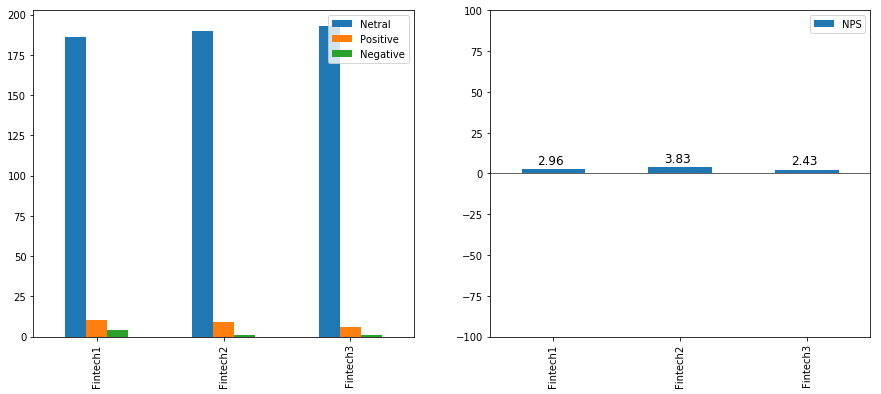

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
df_viz[['Netral', 'Positive', 'Negative']].plot.bar(ax=ax[0])
df_viz[['NPS']].plot.bar(ax=ax[1])
ax[1].set_ylim([-100, 100])
ax[1].axhline(color='k', linewidth=0.6)
    
for i, x in zip(ax[1].patches, df_viz['NPS']):
    ax[1].text(i.get_x()+i.get_width()/4, i.get_height()+3, round(x, 2), fontsize=12, color='k')

We can see, by using sentiment polarity in TextBlob, it basically count the positivity and negativity for each word in the text, regarding to the dictionary in TextBlob. So if the word wasn't found in the dictionary, the word will give zero scores in calculating the polarity.

Note that the translation isn't perfect, so that it may affect the result of this sentiment analysis using TextBlob.

Here, the NPS score for Fintech2 is highest in value.

## Word Cloud

Use word cloud to see what most frequent words appears in each sentiment class, after removing top 10 most frequent words and bottom 10 least frequent words.

In [64]:
from wordcloud import WordCloud, STOPWORDS

In [89]:
def word_cloud_sentiment(df_sentiment, col_class, col_text):
    if (type(df_sentiment) == list):
        classes = sorted(df_sentiment[0][col_class].unique())
        fig, ax = plt.subplots(len(df_sentiment), len(classes), figsize=(16, 9))
        for i, df in enumerate(df_sentiment):
            for c, a in zip(classes, ax[i]):
                c_mask = df[col_class] == c
                wc = " ".join(df[c_mask][col_text].values)
                cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(wc)
                a.imshow(cloud, interpolation='bilinear')
                a.axis('off')
                a.set_title('Class: {}'.format(c))
        fig.show()
    else:
        classes = sorted(df_sentiment[col_class].unique())
        fig, ax = plt.subplots(1, len(classes), figsize=(16, 9))
        for c, a in zip(classes, ax):
            c_mask = df_sentiment[col_class] == c
            wc = " ".join(df_sentiment[c_mask][col_text].values)
            cloud = WordCloud(background_color = "white", max_words = 200, stopwords = set(STOPWORDS)).generate(wc)
            a.imshow(cloud, interpolation='bilinear')
            a.axis('off')
            a.set_title('Class: {}'.format(c))
        fig.show()

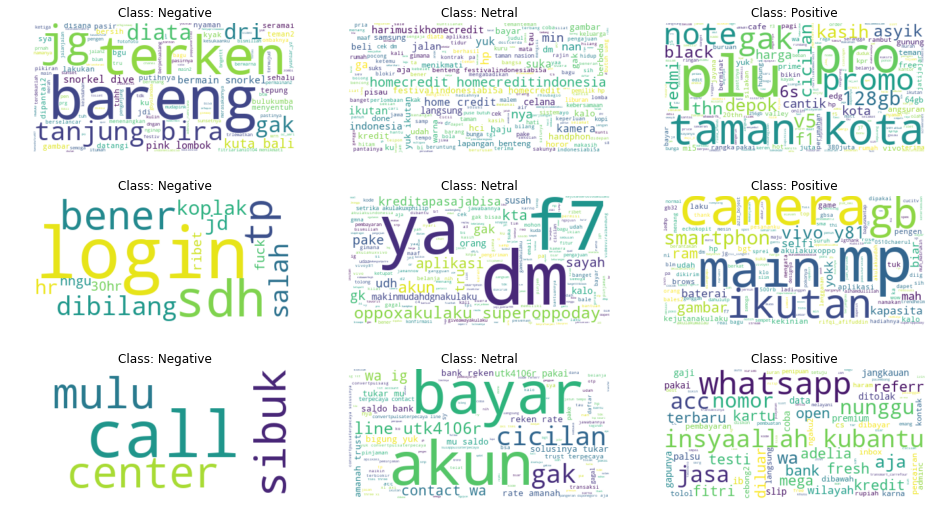

In [90]:
word_cloud_sentiment([df_fintech1, df_fintech2, df_fintech3], 'sentimentclass', 'text')

From here we can see

* The translation is not perfect, some words are not translated, such as 'sibuk', 'bareng'
* There exists a lot of unmeaningful 2 character words that is frequent in appearance 'dm', 'f7', 'mp', 'gb'. Probalbly need to drop those words too in the analysis of sentiment.
* Same frequent words appear in both positive and negative sentiment analysis like 'gak'.